# Chapitre 4 : Du machine learning au deep learning pour la classification d'images 📊🧠

Dans ce cours, nous allons explorer les concepts fondamentaux de la classification d'images en utilisant des modèles de deep learning.
Nous allons utiliser la librairie tensorflow qui permet de créer des modèles de deep learning.

De plus nous ménerons une experience sur la différence de précision entre un modèle CNN et des modèles llm possèdant des attraits pour la classification d'images.

N'hésite pas à lire ces ressources ✅

- [Un cnn c'est quoi ?](https://fr.mathworks.com/discovery/convolutional-neural-network.html)
- [Avantages et applications en IA des cnn](https://www.innovatiana.com/post/convolutional-neural-network)
- [A Complete Guide to Image Classification in 2025](https://viso.ai/computer-vision/image-classification/)
- [Tutoriel sur la régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [CNN Visualizer 🤯](https://poloclub.github.io/cnn-explainer/)
  
Si tu as des questions ! 🙌🏼 Lance-toi !

Durant cette masterclasse nous allons voir les points suivants :

- Comprendre le fonctionnement d'un modèle de deep learning
- Comprendre les concepts de base d'un CNN
- Entraîner un CNN pour la classification d'images
- Juger la performance d'un CNN
- Comprendre les concepts de base d'un LLM
- Entraîner un LLM pour la classification d'images
- Comparer les performances des deux modèles


## Le deep learning ? Kesako ? 🤔

Dans le cours précedents, nous avons vu les concepts de base d'un modèle de machine learning.
Nous avons aussi compris les grands principes de fonctionnement d'un modèle. 

A ce stade, rien ne change. 

Un modèle de deep learning est un modèle de machine learning mais avec des **<span style="color:green">couches cachées</span>**. 

Ces **<span style="color:green">couches cachées</span>** permettent au modèle d'apprendre des représentations intermédiaires des données d'entrée.
Cela permet de capturer des informations plus complexes et abstraites, ce qui est crucial pour les tâches complexes comme la classification d'images.

Mais dans les faits, nous avons toujours: 
 - Une phase de data cleaning 🧹
 - Une phase de data exploration (moins importante pour le deep learning) 🔍
 - Une phase de data preprocessing 🔄
 - Une phase de model training 🏋️‍♂️
 - Une phase de model evaluation 📊
 - Une phase de model inference 🎯

⛔️ Attention ⛔️

En machine et en deep learning, il existe des modèles permettant par exemple de faire :
- De la régression/classification sur des séries temporelles 📈
  - ARIMA en machine learning
  - LSTM en deep learning
  
- De la classification d'images 🌆
  - CNN en deep learning
  - SVM en machine learning
  
- De generer du texte 🧠
  - GPT en deep learning
  - Chaînes de Markov en machine learning

Dans les faits tous dépends de votre problèmatique ainsi que de vos données afin de déterminer le modèle le plus adapté.

Une petite image démonstratif de la différence entre un modèle de machine learning et un modèle de deep learning: 

<div style="text-align: center;">
<img src="./images/mvsd.jpeg" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 0px;"/>
</div>
  
En deep learning, on dit souvent que les modèles s’occupent de la partie **feature extraction** car ils sont capables d’apprendre **directement** à partir des données brutes pour extraire automatiquement les caractéristiques les plus importantes.

<div style="background-color: #ffcccc; padding: 15px; border-radius: 5px; border-left: 8px solid #ff0000; margin: 10px 0; width: 90%;">
    <h3 style="color: #cc0000; margin-top: 0;">⛔️ Attention ⛔️</h3>
    <hr style="height:1px;border-width:0;color:gray;background-color:gray">
    <p>
        Données brut ne signifie pas données non prétraitées. <br>
        Il reste toujours important de prétraiter les données pour les rendre exploitable par le modèle. <br>
        Cependant le travail d'analyse exploratoire reste moins important.
    </p>
</div>



## Le Perceptron ? 🤖

Le perceptron est un type de réseau de neurones simple, composé d'une seule couche cachée.

Il se compose d'une couche d'input, d'une couche cachée et d'une couche de sortie.

Les couches cachées permettent au modèle d'apprendre des représentations intermédiaires des données d'entrée.
Cela permet de capturer des informations plus complexes et abstraites, ce qui est crucial pour les tâches complexes comme de la classification par exemple. 

Dans les faits un réseaux de neuronnes ressemble à cela :

<div style="text-align: center;">
<img src="./images/layer.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 20px;"/>
</div>

Les points importants lors de la création d'un réseau de neurones sont :

| **Paramètre**                     | **Description**                                                                                                                                                                                                                                                                                        |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Input Layer (Couche d'entrée)** | Le nombre de neurones de la couche d'entrée doit correspondre au nombre de features de vos données d'entrée. Chaque neurone de cette couche représente une caractéristique spécifique des données et permet au réseau de recevoir l'intégralité des informations nécessaires pour l'entraînement.    |
| **Nombre de neurones par Hidden Layer (couche cachée)** | Le nombre de neurones dans chaque couche cachée détermine la capacité de modélisation du réseau. Un plus grand nombre de neurones permet de capturer des relations plus complexes dans les données, mais augmente aussi le risque de surapprentissage (overfitting) et le temps de calcul.       |
| **Fonction d'activation**         | La fonction appliquée à la sortie de chaque neurone pour introduire de la non-linéarité dans le modèle, permettant d'apprendre des relations complexes. Exemples courants : Sigmoid (pour des sorties entre 0 et 1), Tanh (pour des sorties entre -1 et 1), ReLU (maximisant à 0 pour les négatifs).   |
| **Fonction de perte (Loss)**      | La fonction utilisée pour mesurer l'erreur du modèle pendant l'entraînement. Exemples : `binary_crossentropy` (pour des tâches de classification binaire), `categorical_crossentropy` (pour la classification multi-classe), `mean_squared_error` (pour la régression).                                    |
| **Optimiseur**                    | L'algorithme qui ajuste les poids du réseau pour minimiser la fonction de perte. Exemples : `adam` (populaire pour sa vitesse et ses capacités d'ajustement dynamique du taux d'apprentissage), `sgd` (Stochastic Gradient Descent, souvent utilisé avec momentum pour améliorer la convergence).  |
| **Batch Size**                    | Le nombre d'exemples utilisés pour une mise à jour des poids pendant l'entraînement. Plus il est élevé, plus l'entraînement peut être rapide, mais une taille de batch trop grande peut entraîner une convergence sous-optimale. Les valeurs courantes sont 16, 32, 64 ou 128.                   |
| **Nombre d'epochs**               | Le nombre de passes complètes sur l'ensemble des données d'entraînement. Un nombre élevé d'epochs peut permettre d'atteindre une meilleure précision, mais augmente aussi le risque de surapprentissage. Ce paramètre est ajusté en fonction de la complexité des données et des performances.         |
| **Output Layer (Couche de sortie)** | La couche de sortie et le nombre de neurones qu'elle contient déterminent si le réseau effectue une tâche de classification ou de régression. Pour la classification binaire, **1 neurone avec une activation Sigmoid est courante** ; **pour la classification multi-classe, plusieurs neurones avec Softmax.** |


Un article très intéressant sur le nombre de neurones par couche cachée : [Beginners Ask “How Many Hidden Layers/Neurons to Use in Artificial Neural Networks?”](https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e)

### Comprendre le fonctionnement d'un neurone 

Un petit éxemple dynamique de réseau de neurones 🤖 :

- [Neural experiment](https://playground.tensorflow.org/#activation=sigmoid&batchSize=30&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0.3&noise=0&networkShape=7,2&seed=0.15220&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)

Revoyons un peu comment se présente un réseau de neurones.

<div style="text-align: center;">
<img src="./images/nnlayer.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 20px;"/>
</div>


Dans l'image précédente, on observe que chaque neurone applique l’équation suivante :

- $ y = \text{ReLU}(w_1 x_1 + w_2 x_2 + w_3 x_3 + b) $

En utilisant des vecteurs, on peut simplifier cette équation en :

- $ y = \text{ReLU}(\mathbf{w} \cdot \mathbf{x} + b) $
  
où :

- $\mathbf{w} = \begin{pmatrix} w_1 \\ w_2 \\ w_3 \end{pmatrix}$ représente les poids associés aux entrées du neurone,
- $\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}$ est le vecteur des entrées.

La fonction $ f $ est la fonction d'activation, ici ReLU.

Cela vous rappelle-t-il quelque chose ?

Cette formule est similaire à l’équation d'une régression linéaire :

- $ y = mx + b $

En effet, sans fonction d'activation, un neurone se comporte de manière **linéaire**, tout comme une ```régression linéaire``` 🧠.

 Cependant, l'ajout de la fonction d'activation (ici ReLU) permet au neurone de modéliser des relations non linéaires, ce qui est essentiel pour capturer des motifs plus complexes dans les données.




## Un petit éxemple de perceptron pour de la régression 🤖

Vous vous rappellez de notre dataset sur les voitures ? 

Nous allons utiliser ce dataset pour entraîner un perceptron.

Il faut retenir que les réseaux de neurones sont performant sur des grands volumes de données.
Cependant nous pouvons faire un test avec un petit dataset pour comprendre son fonctionnement. 

Nous allons utiliser la librairie `tensorflow` pour créer notre perceptron.



In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chargement des données
df = pd.read_csv('./dataset/carprice_df_filtered.csv')

df_shape = df.columns.shape[0]-1
# Sélection des features et de la target
y = df['price']
X = df.drop(columns=['price'])
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(df_shape,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Définition de l'early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# Entraînement du modèle
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=700,
    batch_size=12,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/700
11/11 [==============================] - 0s 9ms/step - loss: 213450944.0000 - mae: 12754.2354 - val_loss: 317883936.0000 - val_mae: 15081.5566
Epoch 2/700
11/11 [==============================] - 0s 2ms/step - loss: 213416992.0000 - mae: 12753.1143 - val_loss: 317830048.0000 - val_mae: 15080.0977
Epoch 3/700
11/11 [==============================] - 0s 3ms/step - loss: 213368208.0000 - mae: 12751.5166 - val_loss: 317745888.0000 - val_mae: 15077.8486
Epoch 4/700
11/11 [==============================] - 0s 3ms/step - loss: 213295696.0000 - mae: 12749.0557 - val_loss: 317603616.0000 - val_mae: 15074.0908
Epoch 5/700
11/11 [==============================] - 0s 3ms/step - loss: 213167120.0000 - mae: 12744.7617 - val_loss: 317361376.0000 - val_mae: 15067.7158
Epoch 6/700
11/11 [==============================] - 0s 3ms/step - loss: 212934912.0000 - mae: 12737.4180 - val_loss: 316943712.0000 - val_mae: 15056.8447
Epoch 7/700
11/11 [==============================] - 0s 2ms/step - los

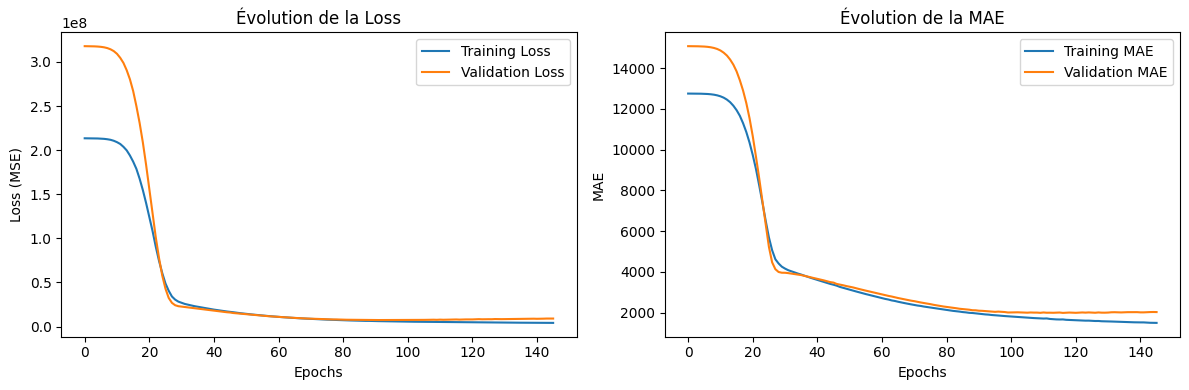

In [48]:
# Visualisation de l'évolution de la loss pendant l'entraînement
plt.figure(figsize=(12, 4))

# Plot de la loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot de la MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Évolution de la MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Sur les deux graphiques précedents, on peut voir que la loss et la MAE diminuent au cours des epochs.
Cela signifie que le modèle est de plus en plus performant.

Bien entendu, nous sommes dans un exemple simpliste a ne pas reproduire, ici le jeux de données carprice ne possède pas assez de données pour un modèle de deep learning.

**Dans ce type de configuration préviligier un modèle de machine learning.**

Performance sur les données de test:
Loss (MSE): 7640019.50
MAE: 1829.39
2/2 [==============================] - 0s 1ms/step


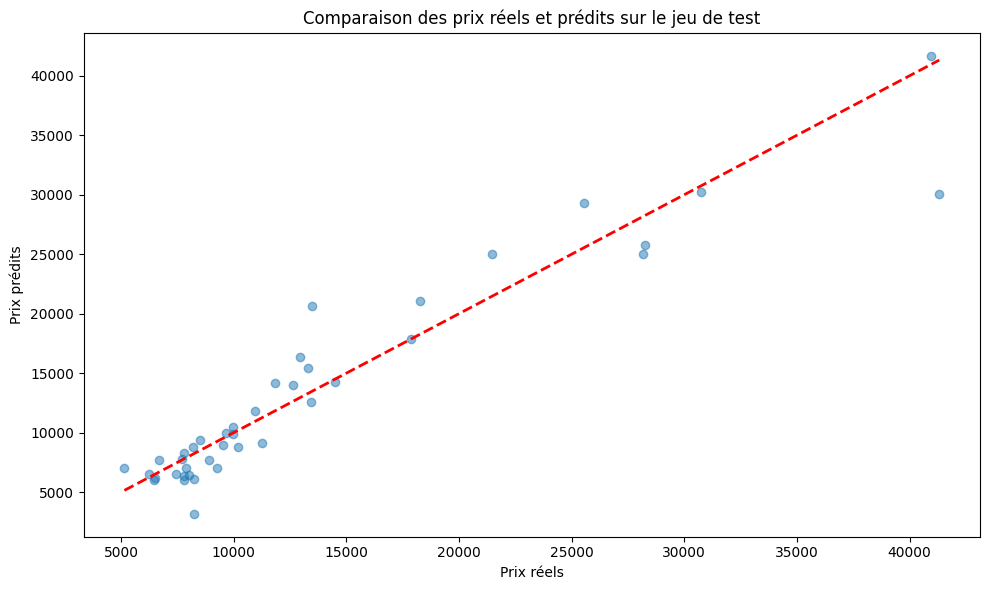

In [45]:
# Évaluation du modèle sur les données de test
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Performance sur les données de test:")
print(f"Loss (MSE): {test_loss:.2f}")
print(f"MAE: {test_mae:.2f}")

# Prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

# Comparaison des prédictions avec les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Prix réels')
plt.ylabel('Prix prédits')
plt.title('Comparaison des prix réels et prédits sur le jeu de test')
plt.tight_layout()
plt.show()


___



In [117]:
print("La dimension des features d'entrée est :", df_shape)

La dimension des features d'entrée est : 23



Si vous avez 23 variables dans votre `input_shape`, cela signifie que chaque neurone (ou cellule) de votre réseau de neurones prendra en entrée un vecteur de 23 valeurs, chaque valeur représentant une des variables de votre entrée.

Pour un neurone avec 23 entrées et une fonction d'activation, comme ReLU, voici comment se présente le calcul réalisé par ce neurone :

 1. **Entrées** : Le neurone reçoit un vecteur d'entrée $\mathbf{x}$ de 23 valeurs.
    - $
    \mathbf{x} = \begin{pmatrix} x_1, x_2, x_3, \dots, x_{23} \end{pmatrix}
    $
 
 2. **Poids** : Le neurone a 23 poids, chacun correspondant à une des 23 variables d'entrée.
    - $
    \mathbf{w} = \begin{pmatrix} w_1, w_2, w_3, \dots, w_{23} \end{pmatrix}
    $
 
 3. **Biais** : Le neurone possède un biais $b$, une constante ajoutée après le produit scalaire.
 
 4. **Calcul linéaire** : Le neurone effectue le produit scalaire entre le vecteur des poids $\mathbf{w}$ et le vecteur d'entrée $\mathbf{x}$, puis ajoute le biais :
    - $
    z = \mathbf{w} \cdot \mathbf{x} + b = w_1 x_1 + w_2 x_2 + \dots + w_{23} x_{23} + b
    $
 
 5. **Fonction d'activation** : Le résultat $z$ est ensuite passé dans une fonction d'activation, comme ReLU, pour produire la sortie $y$ du neurone :
    - $
    y = \text{ReLU}(z) = \text{ReLU}(\mathbf{w} \cdot \mathbf{x} + b)
    $
    Avec ReLU, $y$ sera égal à $z$ si $z > 0$, et 0 sinon.


La fonction relu ressemble à cela : 

<div style="text-align: center;">
<img src="./images/relu.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 20px;"/>
<figcaption>Fonction relu</figcaption>
</div>


Elle indique que pour toute valeur négative de x, la valeur de sortie sera 0 et pour toute valeur positive, la valeur de sortie sera la valeur d'entrée car **linéaire**.



___

## Un perceptron pour de la classification 🤔

Dans cette partie nous allons faire la même chose mais cette fois pour de la classification. 

Nous allons utiliser le dataset Titanic que nous avions déja vu dans les précedentes masterclasses. 

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chargement des données
df = pd.read_csv('dataset/Titanic-Dataset.csv')

# Préparation des données
# Sélection des features pertinentes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features].copy()

# Conversion des variables catégorielles
X['Sex'] = (X['Sex'] == 'male').astype(int)

# Gestion des valeurs manquantes
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Variable cible
y = df['Survived']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Optimisation plus fine
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)

# Compilation avec des métriques supplémentaires
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping plus patient
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100,
    restore_best_weights=True,
)

# Entraînement avec plus d'epochs et batch size optimisé
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=24,
    verbose=1,
    callbacks=[early_stopping],

)

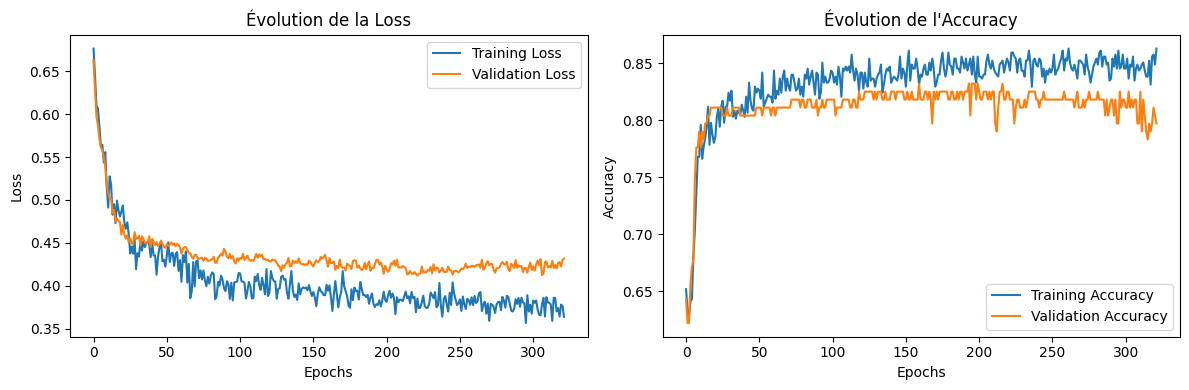

In [19]:
# Visualisation de l'apprentissage
plt.figure(figsize=(12, 4))

# Plot de la loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

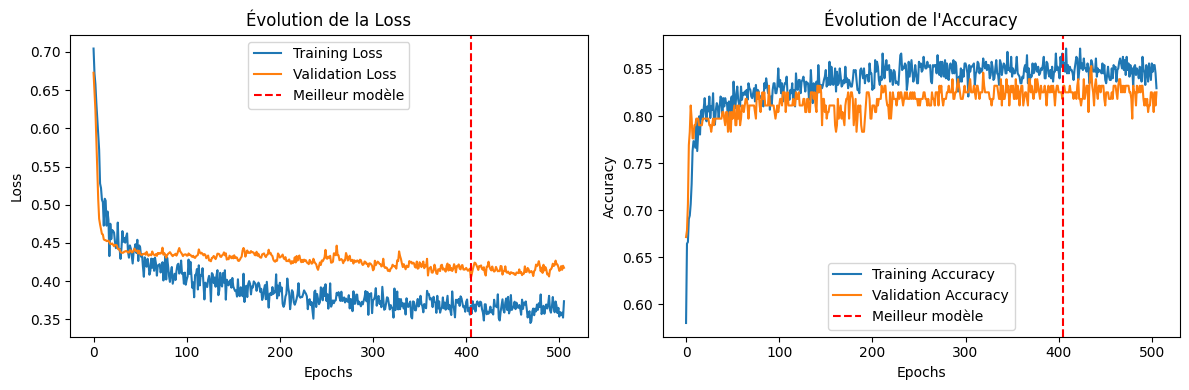

In [29]:
# Visualisation de l'apprentissage avec le meilleur poids
plt.figure(figsize=(12, 4))

# Plot de la loss avec le meilleur point
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=early_stopping.best_epoch, color='r', linestyle='--', label='Meilleur modèle')
plt.title('Évolution de la Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot de l'accuracy avec le meilleur point
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=early_stopping.best_epoch, color='r', linestyle='--', label='Meilleur modèle')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


6/6 [==============================] - 0s 669us/step


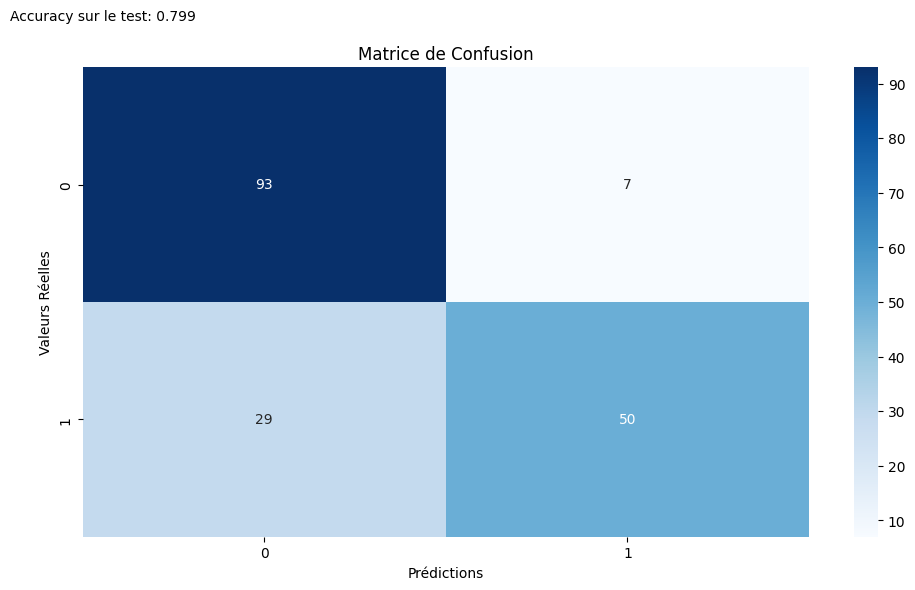

In [20]:
# Évaluation du modèle sur les données de test
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)

# Création de la matrice de confusion
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')

# Ajout des labels pour TP, TN, FP, FN
labels = ['TN', 'FP', 'FN', 'TP']

# Ajout du score de performance
score = model.evaluate(X_test_scaled, y_test, verbose=0)
plt.text(-0.2, -0.2, f'Accuracy sur le test: {score[1]:.3f}')

plt.tight_layout()
plt.show()


In [113]:

# Récupération de l'epoch du meilleur modèle
meilleur_epoch = early_stopping.best_epoch + 1  # +1 car les epochs commencent à 0
print(f"Le modèle s'est arrêté à l'epoch {meilleur_epoch} grâce à l'early stopping")


Le modèle s'est arrêté à l'epoch 114 grâce à l'early stopping


___




## Ok on peut souffler  💨

Nous allons décortiquer tous les éléments que nous avons vu précedement.

Commençons par le code 

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Optimisation plus fine
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)

# Compilation avec des métriques supplémentaires
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping plus patient
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100,
    restore_best_weights=True,
)

# Entraînement avec plus d'epochs et batch size optimisé
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=12,
    verbose=1,
    callbacks=[early_stopping],

)
```


### Construction du réseau de neurones 🧠

Dans notre premier bloc de code:

```python 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```

tf.keras.Sequential permet de créer un réseau de neurones constitué de couches empilées séquentiellement.

Dans ce modèle :

-	La première couche cachée contient 12 neurones, avec une fonction d’activation ReLU, et spécifie ```input_shape```

-	Le deuxième layers contient un dropout il sert à éviter le surapprentissage du modèle (```l'overfitting```)

-	La dernière couche, qui est la couche de sortie, contient 2 neurones avec une fonction d’activation ```Sigmoid```.



Le paramètre ```input_shape``` est défini uniquement pour la première couche afin que le modèle connaisse la forme des données d’entrée.

Enfin, la couche de sortie avec 2 neurones et une activation Sigmoid est adaptée à une tâche de classification binaire : 

- chaque neurone de sortie produit une probabilité pour l’une des classes.

 Jusqu'ici on a :

✅ Éxpliqué le fonctionnement d'un neurone

✅ Créé un réseau de neurones avec des couches cachées

✅ Éxpliqué la fonction d'activation ReLU

✅ Éxpliqué l'importance de l'input_shape

✅ Éxpliqué l'importance de la couche de sortie qui dépend de la tâche que l'on souhaite réaliser (régression ou classification)

✅ Comprendre les dropout

 <div style="background-color: #cce6ff; padding: 15px; border-radius: 5px; border-left: 8px solid #0066ff; margin: 10px 0; width: 90%;">
     <h3 style="color: #0066cc; margin-top: 0;">🔎 Information 🔎</h3>
     <hr style="height:1px;border-width:0;color:gray;background-color:gray">
     <p>
         Le dropout agit comme une règle où, de façon aléatoire à chaque étape d'entraînement, certains  neurones sont "désactivées" temporairement, comme si ils n'étaient pas là. Cela force les autres neurones à prendre plus de responsabilités et à s'impliquer davantage, plutôt que de s'appuyer uniquement sur certains neurones clés. Au lieu de laisser toujours les mêmes neurones "travailler", le réseau devient plus diversifié dans ses connexions et apprend à répartir les informations de manière plus équilibrée.
     </p>
 </div>
  



### L'optimizer et la loss function 🧠

``` python
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
```

Deux élèments cruciaux dans la construction d'un réseau de neurones :

- L'optimizer : C'est l'algorithme qui ajuste les poids des neurones pour minimiser la loss function.

- La loss function : C'est la fonction qui mesure la différence entre les prédictions du modèle et les valeurs réelles.

Dans le cas d'une régression, la loss function est souvent la ```mean squared error``` ou la ```mean absolute error``` ou encore la ```root mean squared error```.

Dans le cas d'une classification, la loss function est souvent la ```binary crossentropy``` ou la ```categorical crossentropy```.

Maintenant parlons de l'optimizer.
L'optimizer est un algorithme qui ajuste les poids des neurones pour minimiser la loss function.
Il agit dans un espace multidimensionnel (tous les poids du réseau) et cherche à trouver le minimum local de la loss function.

<div style="text-align: center;">
<img src="./images/adam.gif" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 0px;"/>
</div>



Le learning rate est un paramètre qui détermine la vitesse à laquelle l'optimizer ajuste les poids.

👉 Plus le learning rate est grand, plus l'optimizer ajuste les poids rapidement, mais il peut manquer le minimum local.

👉Plus le learning rate est petit, plus l'optimizer ajuste les poids lentement, mais il peut converger vers le minimum global.

Il faut donc trouver un équilibre entre la vitesse et la précision du modèle.

## Early stopping 🛑 et entrainement 💪🏼

```python 
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100,
    restore_best_weights=True,
)

# Entraînement avec plus d'epochs et batch size optimisé
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=12,
    verbose=1,
    callbacks=[early_stopping],
)
```

Parlons dans un premier temps de la construction du modèle, j'entends par la le fit sur l'ensemble de nos données d'entrainement.

Il prend en paramètre dans cet éxemple: 

- ```X_train_scaled``` : nos données d'entrainement standardisées
- ```y_train``` : nos étiquettes de classe ou dans le cas de la regression nos valeurs cibles
- ```validation_split=0.2``` : 20% des données d'entrainement sont utilisées pour la validation
- ```epochs=1000``` : 1000 époques d'entrainement
- ```batch_size=12``` : 12 données par batch
- ```verbose=1``` : affichage des informations sur l'entrainement
- ```callbacks=[early_stopping]``` : utilisation de l'early stopping pour éviter le surapprentissage


Garder en tête les élèments suivants :

- L'epoch correspond à une itération sur l'ensemble de nos données d'entrainement, en une époque toutes les données d'entrainement sont passées dans le modèle.
-	Le batch size correspond au nombre de données que le modèle va utiliser pour une itération dans une époque.
	-	Si batch size = 12, le modèle va diviser les données d’entraînement en batches de 12 exemples chacun.
	-	Pour chaque batch, le modèle va faire une prédiction, comparer cette prédiction à la valeur réelle pour calculer l’erreur (loss), puis appliquer la rétropropagation pour calculer les gradients.
	-	Enfin, le modèle met à jour les poids des neurones en fonction des gradients calculés pour réduire l’erreur commise.

Une petite image afin de conceptualiser l'epoch, le batch size, le nombre d'itération ainsi que le recalcul des poids:
<div style="text-align: center;">
<img src="./images/epochvsbatch.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 0px;"/>
</div>


Le but est le suivant, minimiser la loss function.
Cette recherche de minima local est réalisée grâce à l'optimizer.
Et entre chaque batch le modèle met à jour les poids des neurones en fonction des gradients calculés pour réduire l’erreur commise.

Et maintenant parlons de l'early stopping.

C'est assez simple à comprendre, le modèle va s'entrainer et va évaluer sa performance sur les données de validation à chaque époque.
Si la performance ne s'améliore pas, le modèle va s'arrêter.

```python 
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100,
    restore_best_weights=True,
)
```
Ici je précise que je veux que le modèle arrete son entrainement si au bout de 100 epoch je n'ai pas amélioré ma loss function (val_loss).

Cela permet d'éviter le surapprentissage du modèle.

Je dois ensuite restaurer les best weights du modèle avec l'aide de l'enregistrement des valeurs dans mon callback. 

Cela se faire de la sorte :
```python 
restore_best_weights=True,
```

## Les indicateurs à surveiller 💪🏼


### Learning curve 📈 pour la regression et la classification 
La learning curve permet de visualiser l'évolution de la loss function et de l'accuracy au cours de l'entrainement dans le cas d'une classification. 

<div style="text-align: center;">
<img src="./images/learingcurve.png" width="900" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 0px;"/>
</div>


Elle permet d'identifier plusieurs points intéressants :

-	Le surapprentissage
-	Le sous apprentissage
-	Le point optimal d'arrêt de l'entrainement

<div style="text-align: center;">
<img src="./images/overunder.png" width="500" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 0px;"/>
</div>

Nous pouvons le vois maintenant sur notre précedente courbe:

<div style="text-align: center;">
<img src="./images/earlystop.png" width="900" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 0px;"/>
</div>



Dans l'image précèdente, le meilleur modèle est celui qui a été arrêté grâce à l'early stopping.
Ici j'overfit un peu, malgrès le fait que ma loss de validation continue de baisser.

### Les indicateurs de performance 📈

Nous les avons définit précedement, il s'agit de la loss function.

Elle se retrouve dans le history de notre fit.

<div style="text-align: center;">
<img src="./images/loss.png" width="900" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 0px;"/>
</div>

Dans la plupart des cas ou pour l'analyse des images que nous allons faire garder en tête une chose: 

- Le but est de minimiser la loss function
- Plus la loss est faible, plus le modèle est performant
- Plus la loss est élevée, plus le modèle est mauvais
  